In [51]:
import os
os.getcwd()

'C:\\Users\\NITHIN POTLURI\\Desktop'

In [52]:
os.chdir("C:/Users/NITHIN POTLURI/Desktop")
os.getcwd()

'C:\\Users\\NITHIN POTLURI\\Desktop'

In [53]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
water=pd.read_csv(r'water_dataX.csv',encoding='ISO-8859-1',low_memory=False)
water

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.1,11,27,2014
1,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2,0.2,4953,8391,2014
2,1475.0,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.1,3243,5330,2014
3,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.5,5382,8443,2014
4,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.4,3428,5500,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN,NaN,7.9,738.0,7.2,2.7,0.518,0.518,202,2003
1987,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NaN,29,7.5,585.0,6.3,2.6,0.155,0.155,315,2003
1988,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NaN,28,7.6,98.0,6.2,1.2,NaN,NaN,570,2003
1989,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NaN,28,7.7,91.0,6.5,1.3,NaN,NaN,562,2003


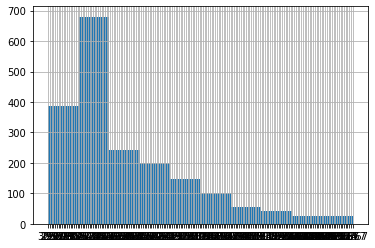

In [54]:
water['Temp'].hist(bins=10)

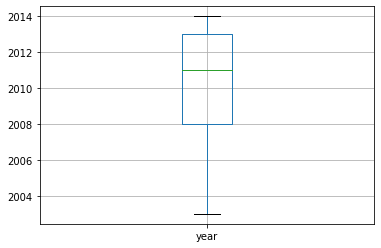

In [55]:
water.boxplot(column='year')

In [56]:
import matplotlib.pyplot as plt

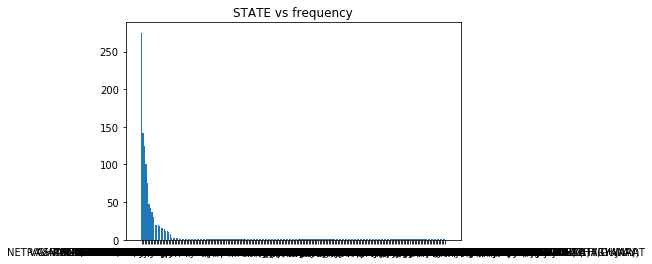

In [57]:
#Bar Graph
fig,ax=plt.subplots()
data=water['STATE'].value_counts()
points=data.index
frequency=data.values
ax.bar(points,frequency)
ax.set_title('STATE vs frequency')
ax.set_label('STATE')
ax.set_label('Frequency')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1C59B710>,
      dtype=object)

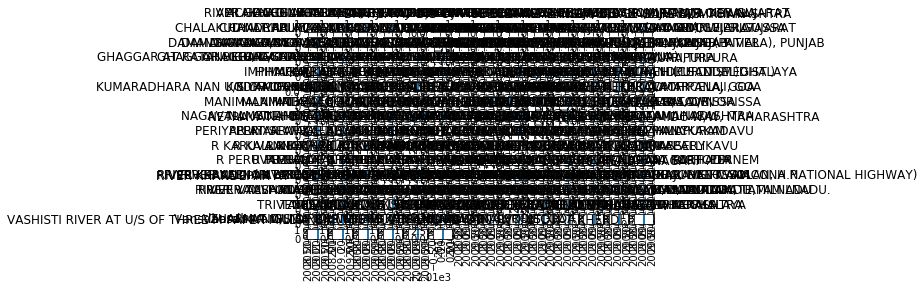

In [58]:
water.hist(column = 'year',by = "STATE",bins = 10)

# taking care of missing values

In [59]:
water.isnull().any()

STATION CODE                         True
LOCATIONS                            True
STATE                                True
Temp                                 True
D.O. (mg/l)                          True
PH                                   True
CONDUCTIVITY (µmhos/cm)              True
B.O.D. (mg/l)                        True
NITRATENAN N+ NITRITENANN (mg/l)     True
FECAL COLIFORM (MPN/100ml)           True
TOTAL COLIFORM (MPN/100ml)Mean       True
year                                False
dtype: bool

In [60]:
water['STATION CODE'].fillna(water['STATION CODE'].mean(),inplace=True)

In [61]:
water['PH'].fillna(water['PH'].mean(),inplace=True)

In [62]:
water['CONDUCTIVITY (µmhos/cm)'].fillna(water['CONDUCTIVITY (µmhos/cm)'].mean(),inplace=True)

In [63]:
water['D.O. (mg/l)'].fillna(water['D.O. (mg/l)'].mean(),inplace=True)

In [64]:
water['year'].fillna(water['year'].mean(),inplace=True)

In [65]:
water.isnull().any()

STATION CODE                        False
LOCATIONS                            True
STATE                                True
Temp                                 True
D.O. (mg/l)                         False
PH                                  False
CONDUCTIVITY (µmhos/cm)             False
B.O.D. (mg/l)                        True
NITRATENAN N+ NITRITENANN (mg/l)     True
FECAL COLIFORM (MPN/100ml)           True
TOTAL COLIFORM (MPN/100ml)Mean       True
year                                False
dtype: bool

In [69]:
#Get a count of missing values in the dataset
water.apply(lambda x: sum(x.isnull()),axis=0)

STATION CODE                          0
LOCATIONS                           184
STATE                               761
Temp                                 88
D.O. (mg/l)                           0
PH                                    0
CONDUCTIVITY (µmhos/cm)               0
B.O.D. (mg/l)                        40
NITRATENAN N+ NITRITENANN (mg/l)    220
FECAL COLIFORM (MPN/100ml)          303
TOTAL COLIFORM (MPN/100ml)Mean      121
year                                  0
dtype: int64

In [71]:
water['Temp'].value_counts()

28        241
29        163
27        161
26        102
30         79
         ... 
29.667      1
22.33       1
28.286      1
28.143      1
21.25       1
Name: Temp, Length: 178, dtype: int64

In [72]:
water['Temp'].fillna('22.33', inplace=True)
water['Temp'].value_counts()

28        241
29        163
27        161
26        102
22.33      89
         ... 
11          1
24.9        1
23.767      1
25.667      1
14          1
Name: Temp, Length: 178, dtype: int64

In [73]:
water['B.O.D. (mg/l)'].value_counts()

1.5      77
1        74
1.2      72
1.1      69
1.6      65
         ..
0.25      1
5.125     1
4.165     1
1.35      1
27.5      1
Name: B.O.D. (mg/l), Length: 407, dtype: int64

In [74]:
water['B.O.D. (mg/l)'].fillna('0.25', inplace=True)
water['B.O.D. (mg/l)'].value_counts()

1.5      77
1        74
1.2      72
1.1      69
1.6      65
         ..
4.475     1
24.5      1
41.5      1
1.313     1
1.758     1
Name: B.O.D. (mg/l), Length: 407, dtype: int64

In [78]:
water['NITRATENAN N+ NITRITENANN (mg/l)'].value_counts()

0.1      77
0.4      55
1        51
0.2      50
0.3      44
         ..
2.05      1
0.383     1
2.955     1
0.348     1
5.02      1
Name: NITRATENAN N+ NITRITENANN (mg/l), Length: 506, dtype: int64

In [79]:
water['NITRATENAN N+ NITRITENANN (mg/l)'].fillna('2.05', inplace=True)
water['NITRATENAN N+ NITRITENANN (mg/l)'].value_counts()

2.05     221
0.1       77
0.4       55
1         51
0.2       50
        ... 
1.028      1
0.383      1
2.955      1
0.348      1
5.02       1
Name: NITRATENAN N+ NITRITENANN (mg/l), Length: 506, dtype: int64

In [81]:
water['FECAL COLIFORM (MPN/100ml)'].value_counts()

4        46
3        29
8        19
12       18
13       17
         ..
2950      1
13775     1
392       1
2495      1
1253      1
Name: FECAL COLIFORM (MPN/100ml), Length: 869, dtype: int64

In [82]:
water['FECAL COLIFORM (MPN/100ml)'].fillna('392', inplace=True)
water['FECAL COLIFORM (MPN/100ml)'].value_counts()

392      304
4         46
3         29
8         19
12        18
        ... 
2950       1
13775      1
2495       1
4698       1
1253       1
Name: FECAL COLIFORM (MPN/100ml), Length: 869, dtype: int64

In [83]:
water['TOTAL COLIFORM (MPN/100ml)Mean'].value_counts()

10       14
45       12
33       12
63       11
         11
         ..
1036      1
227       1
66250     1
62667     1
8925      1
Name: TOTAL COLIFORM (MPN/100ml)Mean, Length: 1094, dtype: int64

In [85]:
water['TOTAL COLIFORM (MPN/100ml)Mean'].fillna('227', inplace=True)
water['TOTAL COLIFORM (MPN/100ml)Mean'].value_counts()

227      122
10        14
33        12
45        12
63        11
        ... 
1036       1
66250      1
62667      1
1196       1
8925       1
Name: TOTAL COLIFORM (MPN/100ml)Mean, Length: 1094, dtype: int64

In [86]:
water.isnull().any()

STATION CODE                        False
LOCATIONS                            True
STATE                                True
Temp                                False
D.O. (mg/l)                         False
PH                                  False
CONDUCTIVITY (µmhos/cm)             False
B.O.D. (mg/l)                       False
NITRATENAN N+ NITRITENANN (mg/l)    False
FECAL COLIFORM (MPN/100ml)          False
TOTAL COLIFORM (MPN/100ml)Mean      False
year                                False
dtype: bool

# Label encoding

In [94]:
x=['LOCATIONS','STATE']
water[x]=water[x].fillna(water.mode().iloc[0])

In [96]:
water.isnull().sum()

STATION CODE                        0
LOCATIONS                           0
STATE                               0
Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                                0
dtype: int64

In [123]:
features=water.iloc[:,1:3].values

In [124]:
features

array([['DAMANGANGA AT D/S OF MADHUBAN, DAMAN', 'DAMAN & DIU'],
       ['ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOINS, GOA', 'GOA'],
       ['ZUARI AT PANCHAWADI', 'GOA'],
       ...,
       ['GUMTI AT U/S SOUTH TRIPURA,TRIPURA', 'KERALA'],
       ['GUMTI AT D/S SOUTH TRIPURA, TRIPURA', 'KERALA'],
       ['CHANDRAPUR, AGARTALA D/S OF HAORA RIVER, TRIPURA', 'KERALA']],
      dtype=object)

In [127]:
labels=water.iloc[:,2].values

In [128]:
labels

array(['DAMAN & DIU', 'GOA', 'GOA', ..., 'KERALA', 'KERALA', 'KERALA'],
      dtype=object)

In [116]:
features

array([['DAMANGANGA AT D/S OF MADHUBAN, DAMAN', 'DAMAN & DIU'],
       ['ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOINS, GOA', 'GOA'],
       ['ZUARI AT PANCHAWADI', 'GOA'],
       ...,
       ['GUMTI AT U/S SOUTH TRIPURA,TRIPURA', 'KERALA'],
       ['GUMTI AT D/S SOUTH TRIPURA, TRIPURA', 'KERALA'],
       ['CHANDRAPUR, AGARTALA D/S OF HAORA RIVER, TRIPURA', 'KERALA']],
      dtype=object)

In [129]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()


In [132]:
features[:,0]

array(['DAMANGANGA AT D/S OF MADHUBAN, DAMAN',
       'ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOINS, GOA',
       'ZUARI AT PANCHAWADI', ..., 'GUMTI AT U/S SOUTH TRIPURA,TRIPURA',
       'GUMTI AT D/S SOUTH TRIPURA, TRIPURA',
       'CHANDRAPUR, AGARTALA D/S OF HAORA RIVER, TRIPURA'], dtype=object)

In [133]:
features[:,0]=lb.fit_transform(features[:,0])

In [134]:
features[:,1]

array(['DAMAN & DIU', 'GOA', 'GOA', ..., 'KERALA', 'KERALA', 'KERALA'],
      dtype=object)

In [135]:
features[:,1]=lb.fit_transform(features[:,1])

In [136]:
features

array([[83, 21],
       [663, 51],
       [664, 51],
       ...,
       [154, 66],
       [151, 66],
       [67, 66]], dtype=object)

# one hot encoding

In [137]:
from sklearn.preprocessing import OneHotEncoder
oh=OneHotEncoder(categorical_features=[0])
features=oh.fit_transform(features).toarray()  

C:\Users\NITHIN POTLURI\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:414: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\NITHIN POTLURI\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:450: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [138]:
features

array([[ 0.,  0.,  0., ...,  0.,  0., 21.],
       [ 0.,  0.,  0., ...,  1.,  0., 51.],
       [ 0.,  0.,  0., ...,  0.,  1., 51.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0., 66.],
       [ 0.,  0.,  0., ...,  0.,  0., 66.],
       [ 0.,  0.,  0., ...,  0.,  0., 66.]])

In [140]:
features=features[:,0:]

In [143]:
features[1,:]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [146]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,labels,test_size=0.2,random_state=0)

In [147]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

x_train =sc.fit_transform(x_train)
x_test = sc.transform(x_test)